In [94]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [207]:
#importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [95]:
# import dataset
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [96]:
print(leads_data.shape,"Have 9240 rows with 37 columns")

(9240, 37) Have 9240 rows with 37 columns


In [97]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [98]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [99]:
leads_data.nunique().sort_values()

Get updates on DM Content                           1
I agree to pay the amount through cheque            1
Receive More Updates About Our Courses              1
Magazine                                            1
Update me on Supply Chain Content                   1
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Origin                 

###### since we have 9240 unique values for prospect id and lead number we can say that for every lead number we only have number and no duplicates
###### we also have columns with one unique value which doesnot add value to the model building so we can eliminate them
###### we can also drop prospect id because we have another identifer column Lead Number

In [100]:
# eliminating columns with 1 unique value

cols_to_drop=['Get updates on DM Content',
'I agree to pay the amount through cheque',
'Receive More Updates About Our Courses',
'Magazine',
'Update me on Supply Chain Content',
'Prospect ID',
'Lead Profile',
'How did you hear about X Education']

leads_data=leads_data.drop(cols_to_drop,axis=1)
leads_data.nunique().sort_values()

Search                                              2
X Education Forums                                  2
Newspaper Article                                   2
A free copy of Mastering The Interview              2
Through Recommendations                             2
Newspaper                                           2
Digital Advertisement                               2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
Asymmetrique Profile Index                          3
Asymmetrique Activity Index                         3
What matters most to you in choosing a course       3
Lead Quality                                        5
Lead Origin                                         5
What is your current occupation                     6
City                                                7
Asymmetrique Profile Score                         10
Asymmetrique Activity Score 

##### check for missing values

In [101]:
(leads_data.isnull().sum()* 100 / len(leads_data)).sort_values()

Lead Number                                       0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
A free copy of Mastering The Interview            0.000000
Search                                            0.000000
Last Notable Activity                             0.000000
Lead Origin                                       0.000000
Total Time Spent on Website                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Lead Source                                       0.389610
Last Activity                                     1.114719
TotalVisits                                       1.4826

###### we can see columns having missing values more than 45% so we eliminate them 

In [102]:
cols_to_drop=['Asymmetrique Activity Index',
'Asymmetrique Profile Index',
'Asymmetrique Activity Score',
'Asymmetrique Profile Score',
'Lead Quality']


leads_data=leads_data.drop(cols_to_drop,axis=1)
leads_data.nunique().sort_values()

Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
What matters most to you in choosing a course       3
Lead Origin                                         5
What is your current occupation                     6
City                                                7
Last Notable Activity                              16
Last Activity                                      17
Specialization                                     19
Lead Source                                        21
Tags                        

###### now let us check each columns and see how we can handle missing values

In [103]:
(leads_data.isnull().sum()* 100 / len(leads_data)).sort_values()

Lead Number                                       0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Search                                            0.000000
A free copy of Mastering The Interview            0.000000
Last Notable Activity                             0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Call                                       0.000000
Do Not Email                                      0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Last Activity                                     1.114719
TotalVisits                                       1.4826

##### now lets check Lead Source col

In [104]:
leads_data['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [105]:
leads_data['Lead Source'].fillna(leads_data['Lead Source'].mode()[0],inplace=True)

In [106]:
print("Lead Source missing values are handled now")

Lead Source missing values are handled now


In [107]:
(leads_data.isnull().sum()* 100 / len(leads_data)).sort_values()

Lead Number                                       0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Search                                            0.000000
A free copy of Mastering The Interview            0.000000
Last Notable Activity                             0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Call                                       0.000000
Do Not Email                                      0.000000
Lead Source                                       0.000000
Lead Origin                                       0.000000
Last Activity                                     1.114719
TotalVisits                                       1.4826

###### Now lets handle City missing values

In [108]:
leads_data['City'].value_counts(normalize=True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

In [109]:
## we can replace City missing values with city mode that is Mumbai
print('City Mode:',leads_data['City'].mode()[0])
leads_data['City'].fillna(leads_data['City'].mode()[0],inplace=True)

City Mode: Mumbai


In [110]:
print("City missing values are handled now")
(leads_data.isnull().sum()* 100 / len(leads_data)).sort_values()

City missing values are handled now


Lead Number                                       0.000000
City                                              0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Search                                            0.000000
A free copy of Mastering The Interview            0.000000
Last Notable Activity                             0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Call                                       0.000000
Do Not Email                                      0.000000
Lead Source                                       0.000000
Lead Origin                                       0.000000
Last Activity                                     1.1147

##### Now lets handle Specialization missing values using mode

In [111]:
print('Specialization Mode:',leads_data['Specialization'].mode()[0])
leads_data['Specialization'].fillna(leads_data['Specialization'].mode()[0],inplace=True)

Specialization Mode: Select


#### Since we have select as mode which does not make sense we can replace select with nan and do the replace once again

In [112]:
leads_data= leads_data.replace('Select',np.nan)

In [113]:
leads_data['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [114]:
#### we can replace null values with others because null values have more percenatge of nulls

In [115]:
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan,'Others')

In [116]:
leads_data['Specialization'].value_counts(normalize=True)

Others                               0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

##### now lets handle tags data
##### since the tags data was added manually by the sales team we cannot depend on this data so we can drop this

In [117]:
leads_data = leads_data.drop('Tags', axis=1)

In [118]:
(leads_data.isnull().sum()* 100 / len(leads_data)).sort_values()

Lead Number                                       0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Search                                            0.000000
A free copy of Mastering The Interview            0.000000
Specialization                                    0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Call                                       0.000000
Do Not Email                                      0.000000
Lead Source                                       0.000000
Lead Origin                                       0.000000
Last Notable Activity                             0.000000
Last Activity                                     1.1147

##### now lets handle city

In [119]:
leads_data.City.value_counts(normalize=True)

Mumbai                         0.663997
Thane & Outskirts              0.107567
Other Cities                   0.098126
Other Cities of Maharashtra    0.065370
Other Metro Cities             0.054356
Tier II Cities                 0.010585
Name: City, dtype: float64

In [120]:
## Since we have high % of Mumbai so we can replace nulls with Mumbai
leads_data['City'] = leads_data['City'].replace(np.nan,'Mumbai')

In [121]:
(leads_data.isnull().sum()* 100 / len(leads_data)).sort_values()

Lead Number                                       0.000000
City                                              0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Search                                            0.000000
A free copy of Mastering The Interview            0.000000
Specialization                                    0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Call                                       0.000000
Do Not Email                                      0.000000
Lead Source                                       0.000000
Lead Origin                                       0.000000
Last Notable Activity                             0.0000

##### Handle Country

In [122]:
leads_data['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [123]:
##### Its almost mono because 96% of the data falls to India so it doesnot impact the model so we can drop this

In [124]:
leads_data = leads_data.drop('Country', axis=1)

In [125]:
(leads_data.isnull().sum()* 100 / len(leads_data)).sort_values()

Lead Number                                       0.000000
City                                              0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Search                                            0.000000
A free copy of Mastering The Interview            0.000000
Specialization                                    0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Call                                       0.000000
Do Not Email                                      0.000000
Lead Source                                       0.000000
Lead Origin                                       0.000000
Last Notable Activity                             0.0000

In [126]:
leads_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [127]:
#### so 85% of the data is Unemployed so we can impute missing values with Unemployed

In [128]:
leads_data['What is your current occupation'] =leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [129]:
(leads_data.isnull().sum()* 100 / len(leads_data)).sort_values()

Lead Number                                       0.000000
City                                              0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Search                                            0.000000
What is your current occupation                   0.000000
A free copy of Mastering The Interview            0.000000
Specialization                                    0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Call                                       0.000000
Do Not Email                                      0.000000
Lead Source                                       0.000000
Lead Origin                                       0.0000

In [130]:
leads_data['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [131]:
##### since all who take this course will have better career prospects we can drop this because its skewed

In [132]:
leads_data = leads_data.drop('What matters most to you in choosing a course', axis=1)

In [133]:
(leads_data.isnull().sum()* 100 / len(leads_data)).sort_values()

Lead Number                               0.000000
City                                      0.000000
Through Recommendations                   0.000000
Digital Advertisement                     0.000000
Newspaper                                 0.000000
X Education Forums                        0.000000
Newspaper Article                         0.000000
Search                                    0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Specialization                            0.000000
Total Time Spent on Website               0.000000
Converted                                 0.000000
Do Not Call                               0.000000
Do Not Email                              0.000000
Lead Source                               0.000000
Lead Origin                               0.000000
Last Notable Activity                     0.000000
Last Activity                             1.114719
Page Views Per Visit           

## Step 3 : Univariate Analysis

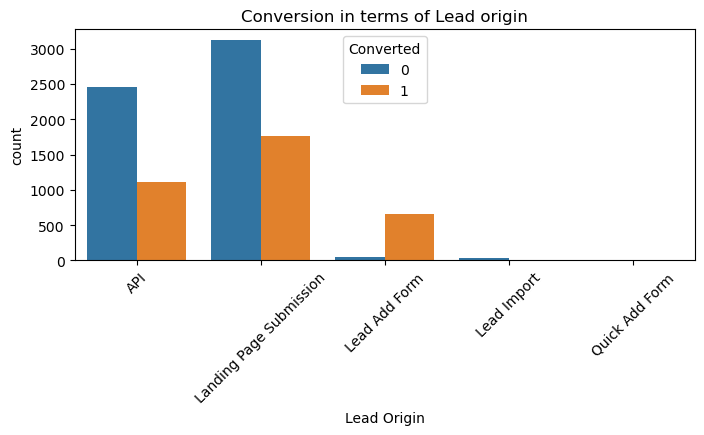

In [138]:
plt.figure(figsize=(8,3))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_data)
plt.title("Conversion in terms of Lead origin")
plt.xticks(rotation=45)
plt.show()

In [148]:
def summary(df,col):
    convert=df.pivot_table(values='Lead Number',index=col ,columns='Converted', aggfunc='count').fillna(0)
    convert["Conversion(%)"] =round(convert[1]/(convert[0]+convert[1]),2)*100
    print(convert.sort_values(ascending=False,by="Conversion(%)"))

In [149]:
summary(leads_data,"Lead Origin")

Converted                     0       1  Conversion(%)
Lead Origin                                           
Quick Add Form              0.0     1.0          100.0
Lead Add Form              54.0   664.0           92.0
Landing Page Submission  3118.0  1768.0           36.0
API                      2465.0  1115.0           31.0
Lead Import                42.0    13.0           24.0


Observation
From the above plot and Lead origin conversion summary, we can infer that:
Lead Add Form has the highest conversion rate at 92%
API and Landing Page Submission have 31% and 36% conversion rate but they generate maximum leads counts.
Lead Import has the least amount of conversions and leads count.
To improve overall lead conversion rate, focus should be on improving lead conversion rate of API and Landing Page Submission.
Also,generate more leads from Lead Add form since they have a very good conversion rate

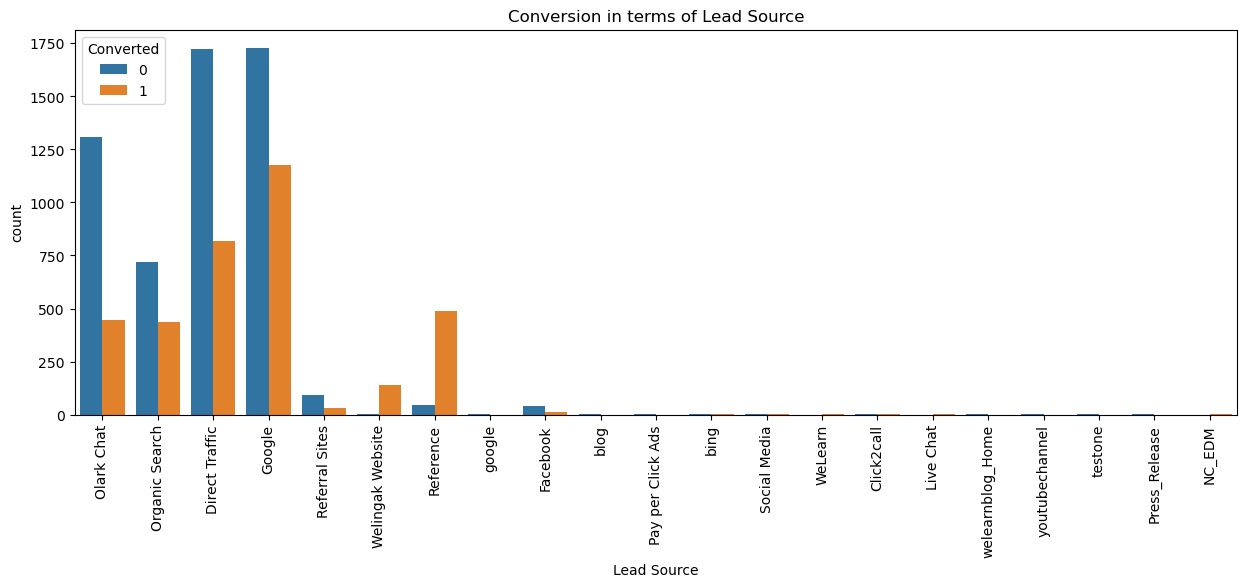

In [142]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data)
plt.title("Conversion in terms of Lead Source")
plt.xticks(rotation=90)
plt.show()

In [143]:
#### we can see same attributes with different names likem Google and google so we can create a single value

In [144]:
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['google'], 'Google')
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

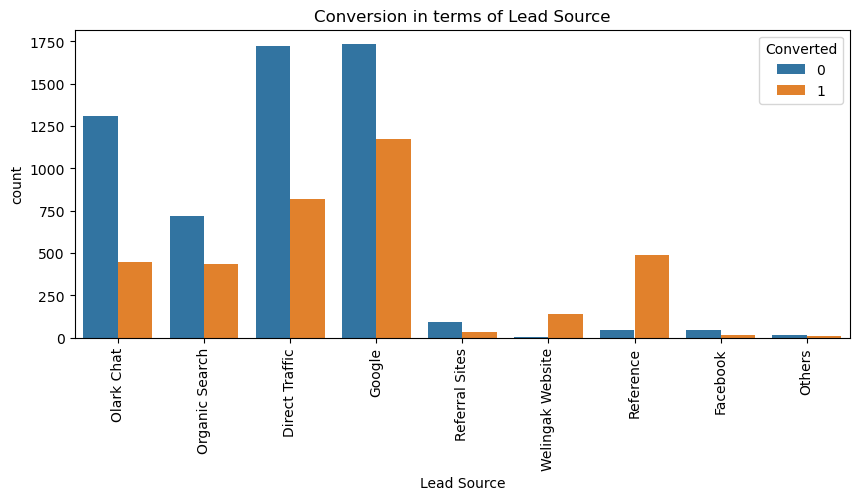

In [147]:
plt.figure(figsize=(10,4))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data)
plt.title("Conversion in terms of Lead Source")
plt.xticks(rotation=90)
plt.show()


In [151]:
summary(leads_data,"Lead Source")

Converted            0     1  Conversion(%)
Lead Source                                
Welingak Website     2   140           99.0
Reference           44   490           92.0
Google            1733  1176           40.0
Others              14     9           39.0
Organic Search     718   436           38.0
Direct Traffic    1725   818           32.0
Olark Chat        1307   448           26.0
Referral Sites      94    31           25.0
Facebook            42    13           24.0


In [152]:
#### Google and direct traffic generates maximum number of leads but has conversion rate of 40% and 32%.
#### Welingak website and References has highest conversion rates around 98% and 93% but generates less number of leads.

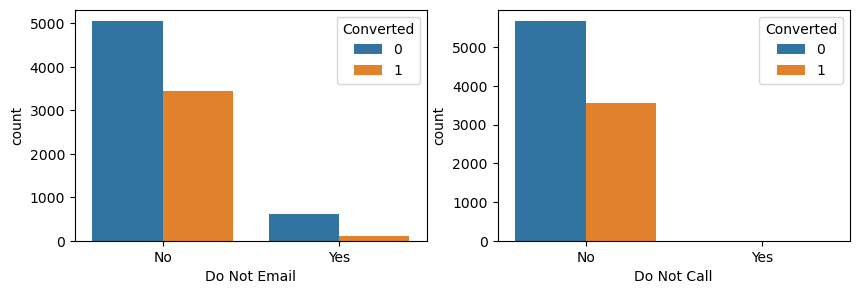

In [153]:
fig, axs = plt.subplots(1,2,figsize = (10,3))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_data, ax = axs[1])
plt.show()

In [154]:
summary(leads_data,"Do Not Email")

Converted        0     1  Conversion(%)
Do Not Email                           
No            5063  3443           40.0
Yes            616   118           16.0


In [155]:
summary(leads_data,"Do Not Call")

Converted         0       1  Conversion(%)
Do Not Call                               
Yes             0.0     2.0          100.0
No           5679.0  3559.0           39.0


most of the customers do not like to be called or receive emails about the course.

In [156]:
# Total Visits

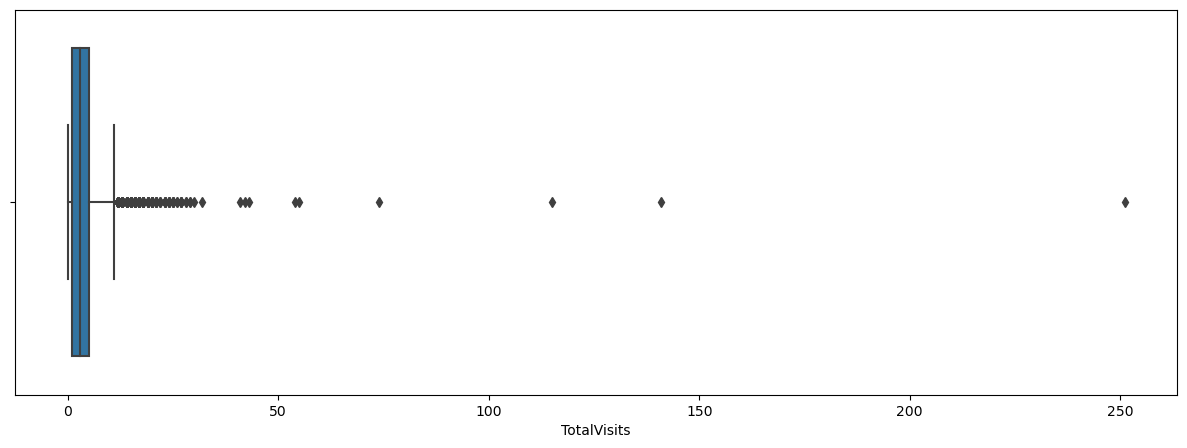

In [157]:
plt.figure(figsize=(15,5))
sns.boxplot(leads_data['TotalVisits'])
plt.show()

Since we have outliers in total visits we can consider only data under 95%

In [159]:
percentiles = leads_data['TotalVisits'].quantile([0.05,0.95]).values
leads_data['TotalVisits'][leads_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_data['TotalVisits'][leads_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

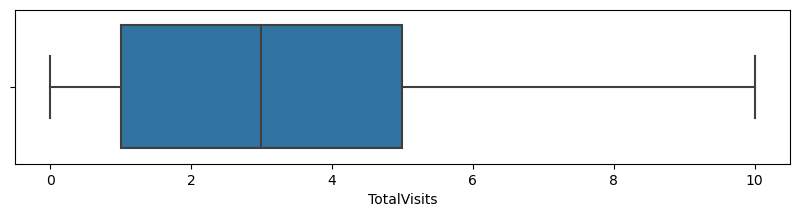

In [162]:
plt.figure(figsize=(10,2))
sns.boxplot(leads_data['TotalVisits'])
plt.show()

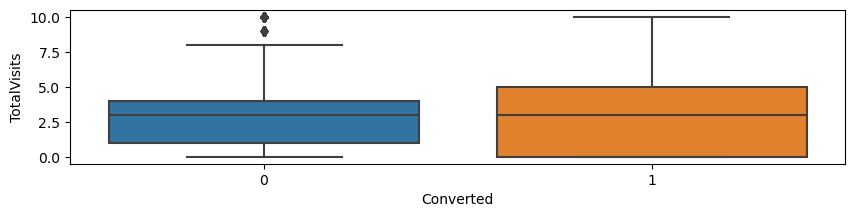

In [163]:
plt.figure(figsize=(10,2))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data)
plt.show()

In [164]:
## Median is same for both converted and not converted

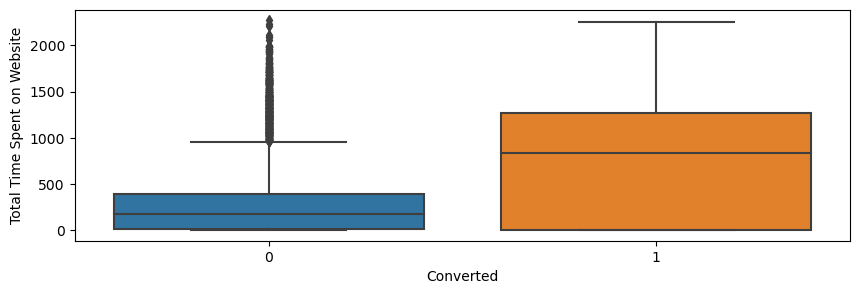

In [166]:
plt.figure(figsize=(10,3))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_data)
plt.show()

In [167]:
## we can total time spent on website is directly proportional to convertion rate

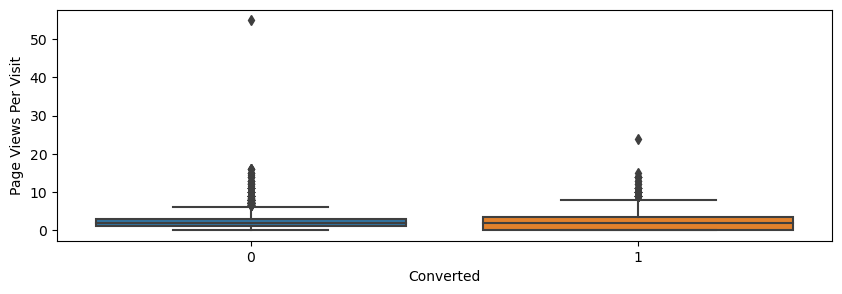

In [168]:
plt.figure(figsize=(10,3))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data)
plt.show()

In [169]:
### Again we have outliers in pave views per visit to lets consider data under 95% percentile

In [170]:
percentiles = leads_data['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

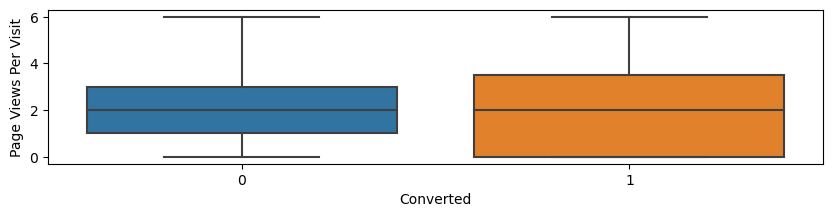

In [171]:
plt.figure(figsize=(10,2))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data)
plt.show()

In [172]:
# People who dont visit any pages have higher conversion chances

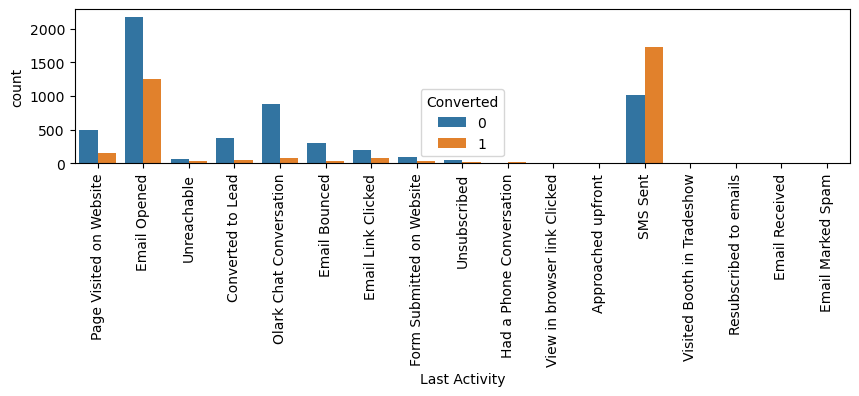

In [173]:
plt.figure(figsize=(10,2))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.show()

In [174]:
summary(leads_data,"Last Activity")

Converted                          0       1  Conversion(%)
Last Activity                                              
Approached upfront               0.0     9.0          100.0
Email Marked Spam                0.0     2.0          100.0
Resubscribed to emails           0.0     1.0          100.0
Email Received                   0.0     2.0          100.0
Had a Phone Conversation         8.0    22.0           73.0
SMS Sent                      1018.0  1727.0           63.0
Email Opened                  2184.0  1253.0           36.0
Unreachable                     62.0    31.0           33.0
Email Link Clicked             194.0    73.0           27.0
Unsubscribed                    45.0    16.0           26.0
Form Submitted on Website       88.0    28.0           24.0
Page Visited on Website        489.0   151.0           24.0
View in browser link Clicked     5.0     1.0           17.0
Converted to Lead              374.0    54.0           13.0
Olark Chat Conversation        889.0    

1. Maximum leads are generated from people with last activity - Email opened and SMS sent.
2. Conversion rate is around 63% and 36% .
3. To improve overall lead conversion rate, focus should be on improving lead conversion of people with last activity -olark chat conversation,SMS sent and Page Visited on Website .



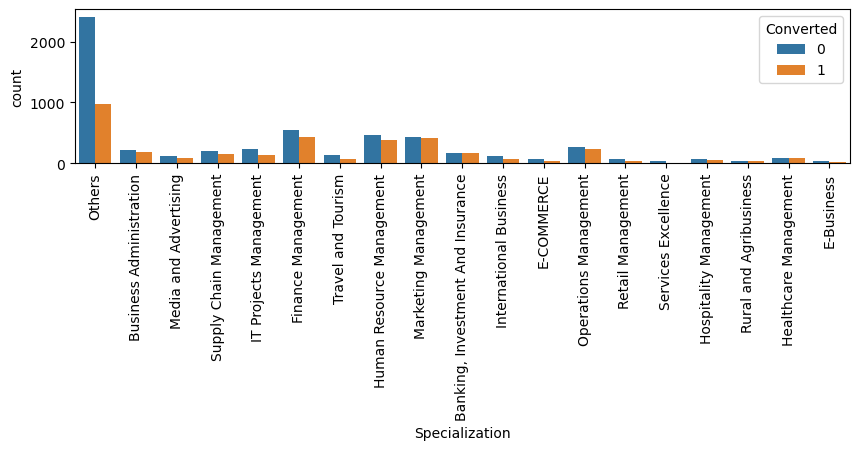

In [175]:
plt.figure(figsize=(10,2))
sns.countplot(x = "Specialization", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.show()

In [176]:
summary(leads_data,"Specialization")

Converted                             0    1  Conversion(%)
Specialization                                             
Healthcare Management                80   79           50.0
Banking, Investment And Insurance   171  167           49.0
Marketing Management                430  408           49.0
Operations Management               265  238           47.0
Human Resource Management           460  388           46.0
Finance Management                  540  436           45.0
Business Administration             224  179           44.0
Supply Chain Management             198  151           43.0
Rural and Agribusiness               42   31           42.0
Hospitality Management               66   48           42.0
Media and Advertising               118   85           42.0
IT Projects Management              226  140           38.0
E-Business                           36   21           37.0
International Business              114   64           36.0
E-COMMERCE                           72 

Most of the specialization have around 40-50% conversion rate.

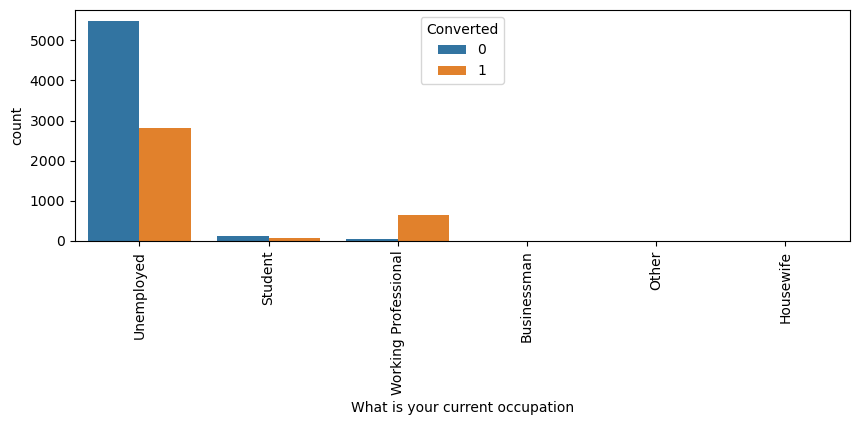

In [178]:
plt.figure(figsize=(10,3))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.show()

In [179]:
summary(leads_data,"What is your current occupation")

Converted                             0       1  Conversion(%)
What is your current occupation                               
Housewife                           0.0    10.0          100.0
Working Professional               59.0   647.0           92.0
Businessman                         3.0     5.0           62.0
Other                               6.0    10.0           62.0
Student                           132.0    78.0           37.0
Unemployed                       5479.0  2811.0           34.0


In [180]:
### Working Professionals and Unemployed people generates maximum leads .

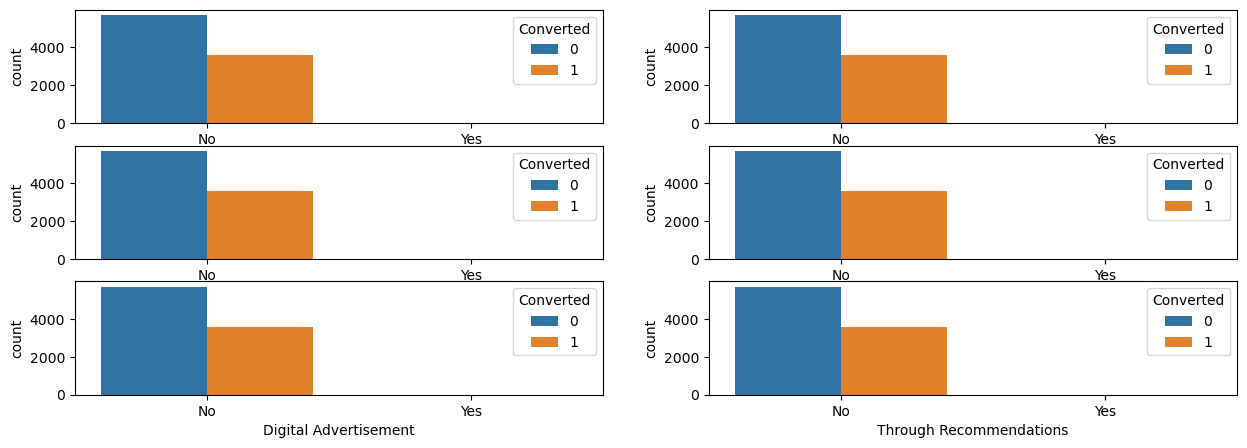

In [181]:
plt.figure(figsize=(15,5))

plt.subplot(3,2,1)
sns.countplot(x = "Search", hue = "Converted", data = leads_data)

plt.subplot(3,2,2)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_data)

plt.subplot(3,2,3)
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_data)

plt.subplot(3,2,4)
sns.countplot(x = "Newspaper", hue = "Converted", data = leads_data)

plt.subplot(3,2,5)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_data)

plt.subplot(3,2,6)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_data)

plt.show()

Almost 99% customers have not seen the X education ad in search, Newspaper article , X Education Forums , Newspaper, Digital Advertisement or Through Recommendations

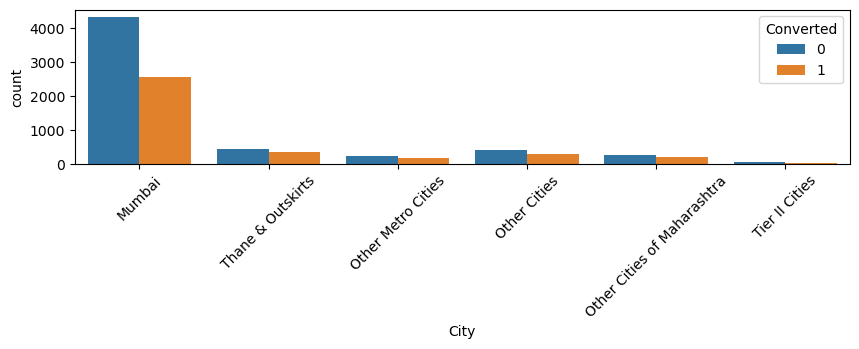

In [186]:
plt.figure(figsize=(10,2))
sns.countplot(x = "City", hue = "Converted", data = leads_data)
plt.xticks(rotation=45)
plt.show()

In [184]:
summary(leads_data,"City")

Converted                       0     1  Conversion(%)
City                                                  
Thane & Outskirts             414   338           45.0
Other Cities of Maharashtra   256   201           44.0
Other Metro Cities            225   155           41.0
Other Cities                  410   276           40.0
Mumbai                       4325  2566           37.0
Tier II Cities                 49    25           34.0


Maximum leads are generated from Mumbai city with conversion rate of around 36% .Hence focus should me more on increasing conversion rate of Mumbai city

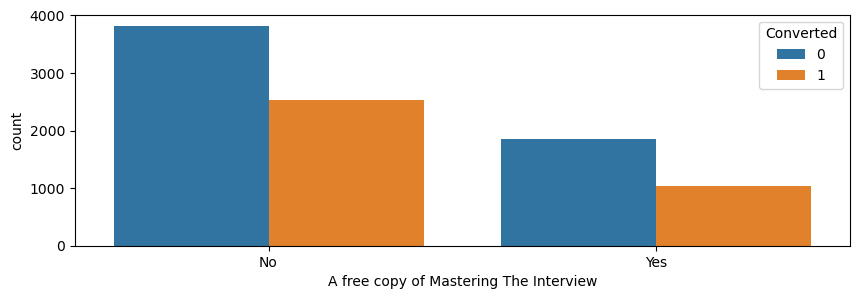

In [187]:
plt.figure(figsize=(10,3))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_data)

plt.show()

In [188]:
summary(leads_data,"A free copy of Mastering The Interview")

Converted                                  0     1  Conversion(%)
A free copy of Mastering The Interview                           
No                                      3821  2531           40.0
Yes                                     1858  1030           36.0


Customers who opted for free copy had conversion rate of 36% while the ones who didnt opt had conversion rate of 39%



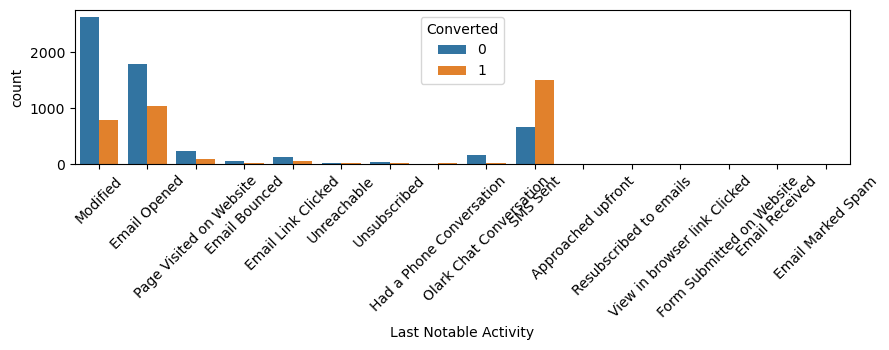

In [190]:
plt.figure(figsize=(10,2))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_data)
plt.xticks(rotation = 45)
plt.show()

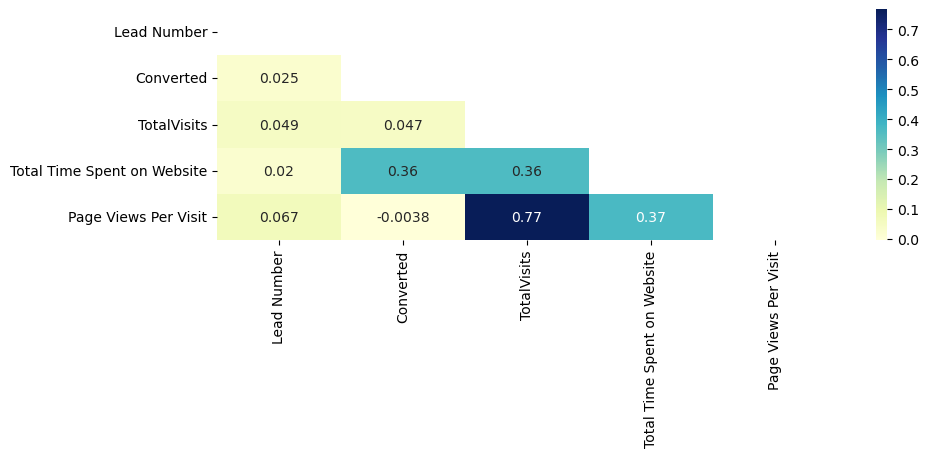

In [194]:
plt.figure(figsize = (10,3))
mask = np.zeros_like(leads_data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(leads_data.corr(), mask=mask,annot = True, cmap="YlGnBu")
plt.show()

Total visits and Page views per visit column are correlated.

From our above analysis we can see many variables are not significant for our model so we can drop them

In [195]:
leads_data = leads_data.drop(['Lead Number','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations'],1)

In [196]:
leads_data.shape

(9240, 14)

## Step 4 : Data Preperation

#### converting binary variables to 0,1

In [199]:
varlist =  ['A free copy of Mastering The Interview','Do Not Email','Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the map function to the binary variables list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

#### Create a dummy variable for the categorical variables

In [200]:
dummy = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity']
dummy_data = pd.get_dummies(leads_data[dummy],drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [201]:
# Combining dummy data with the original dataset

leads_data = pd.concat([leads_data, dummy_data], axis=1)
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,...,0,0,1,0,0,0,0,0,0,0


In [202]:
# Drop the original columns 
drop_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity','Lead Source_Others','Specialization_Others']
leads_data= leads_data.drop(drop_cols, axis=1)
leads_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [203]:
leads_data.shape

(9240, 76)

## Step 5: Train test Split

In [205]:
# Putting feature variable to X
X = leads_data.drop(['Converted'], axis=1)


# Putting response variable to y
y = leads_data['Converted']

In [208]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 6: Feature Scaling

In [210]:
scaler = StandardScaler()

#Apply scaler() to numerical columns
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-1.141867,-0.885371,-1.259268,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.296462,0.005716,-0.514685,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.656044,-0.691418,0.140325,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.656044,1.365219,1.539918,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,-1.141867,-0.885371,-1.259268,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Step 7: Feature Selection Using RFE

In [224]:
# logreg = LogisticRegression()

# # running RFE with 20 variables as output
# rfe = RFE(logreg,n_features_to_select=20) 
# rfe = rfe.fit(X_train, y_train)

In [225]:
X_train = X_train[np.isfinite(leads_data).all(1)]
y_train = y_train[np.isfinite(leads_data).all(1)]


In [226]:
logreg = LogisticRegression()

# running RFE with 20 variables as output
rfe = RFE(logreg,n_features_to_select=20) 
rfe = rfe.fit(X_train, y_train)

In [227]:
rfe.support_

array([ True, False, False,  True, False, False, False,  True, False,
       False, False, False,  True, False, False, False,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True, False, False, False, False, False, False,  True, False,
        True, False, False,  True,  True,  True, False, False, False,
        True, False, False])

In [228]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 20),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('A free copy of Mastering The Interview', False, 33),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Origin_Quick Add Form', False, 55),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 49),
 ('Lead Source_Reference', False, 26),
 ('Lead Source_Referral Sites', False, 52),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 24),
 ('Last Activity_Email Marked Spam', False, 40),
 ('Last Activity_Email Opened', False, 39),
 ('Last Activity_Email Received', False, 46),
 ('Last Activity_Form Submitted on We

In [229]:
col1 = X_train.columns[rfe.support_]
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [230]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management

## Step 9 : Model Building

In [232]:
#BUILDING MODEL #1
X_train_sm = sm.add_constant(X_train[col1])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6369
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.5
Date:                Sat, 21 Jan 2023   Deviance:                       5285.0
Time:                        15:30:44   Pearson chi2:                 6.61e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3898
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3469      0.673      0.516      0.606      -0.972       1.665
Do Not Email                                            -1.2470      0.197     -6.318      0.000      -1.634      -0.860
Total Time Spent on Website                              1.0984      0.040     27.497      0.000       1.020       1.177
Lead Origin_Lead Add Form                                3.8937      0.218     17.895      0.000       3.467       4.320
Lead Source_Olark Chat                                   1.1133      0.102     10.891      0.000       0.913       1.314
Lead Source_Welingak Website                             1.7159      0.752      2.283      0.022       0.243       3.189
Last Activity_Converted to Lead                         -1.2486      0.229     -5.456      0.000      -1.697      -0.800
Last Activity_Email Bounced                             -1.3782      0.381     -3.621      0.000      -2.124      -0.632
Last Activity_Had a Phone Conversation                   1.4110      1.101      1.281      0.200      -0.747       3.569
Last Activity_Olark Chat Conversation                   -1.4126      0.195     -7.256      0.000      -1.794      -1.031
Last Activity_Page Visited on Website                   -1.2533      0.149     -8.392      0.000      -1.546      -0.961
What is your current occupation_Housewife               22.6987   1.48e+04      0.002      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                  0.0386      0.708      0.055      0.957      -1.348       1.425
What is your current occupation_Unemployed              -0.3124      0.669     -0.467      0.640      -1.623       0.998
What is your current occupation_Working Professional     2.5908      0.695      3.730      0.000       1.229       3.952
Last Notable Activity_Email Link Clicked                -1.8556      0.274     -6.767      0.000      -2.393      -1.318
Last Notable Activity_Email Opened                      -1.2838      0.086    -14.856      0.000      -1.453      -1.114
Last Notable Activity_Had a Phone Conversation           0.7721      1.556      0.496      0.620      -2.277       3.822
Last Notable Activity_Modified                          -1.4422      0.098    -14.649      0.000      -1.635      -1.249
Last Notable Activity_Olark Chat Conversation           -1.1836      0.374     -3.163      0.002      -1.917      -0.450
Last Notable Activity_Unreachable                        0.3597      0.517      0.696      0.487      -0.654       1.373
========================================================================================================================
"""

In [233]:
##. checking vif

In [234]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,4.28
17,Last Notable Activity_Modified,3.01
7,Last Activity_Had a Phone Conversation,2.39
16,Last Notable Activity_Had a Phone Conversation,2.39
15,Last Notable Activity_Email Opened,2.25
8,Last Activity_Olark Chat Conversation,2.06
0,Do Not Email,1.89
6,Last Activity_Email Bounced,1.83
3,Lead Source_Olark Chat,1.80
2,Lead Origin_Lead Add Form,1.52


In [236]:
## The p value for column 'What is your current occupation_Housewife' is very high and above the threshold.
## Hence we will drop this column from our model

In [237]:
col2 = col1.drop('What is your current occupation_Housewife',1)
col2

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [238]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6369
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.5
Date:                Sat, 21 Jan 2023   Deviance:                       5293.0
Time:                        15:31:39   Pearson chi2:                 6.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3890
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2734      0.538      2.367      0.018       0.219       2.328
Do Not Email                                            -1.2539      0.197     -6.352      0.000      -1.641      -0.867
Total Time Spent on Website                              1.0961      0.040     27.473      0.000       1.018       1.174
Lead Origin_Lead Add Form                                3.8950      0.217     17.914      0.000       3.469       4.321
Lead Source_Olark Chat                                   1.1104      0.102     10.868      0.000       0.910       1.311
Lead Source_Welingak Website                             1.7114      0.752      2.277      0.023       0.238       3.184
Last Activity_Converted to Lead                         -1.2504      0.229     -5.466      0.000      -1.699      -0.802
Last Activity_Email Bounced                             -1.3725      0.381     -3.606      0.000      -2.118      -0.627
Last Activity_Had a Phone Conversation                   1.4099      1.101      1.280      0.200      -0.748       3.568
Last Activity_Olark Chat Conversation                   -1.4234      0.195     -7.309      0.000      -1.805      -1.042
Last Activity_Page Visited on Website                   -1.2668      0.149     -8.484      0.000      -1.559      -0.974
What is your current occupation_Student                 -0.8856      0.582     -1.523      0.128      -2.025       0.254
What is your current occupation_Unemployed              -1.2367      0.533     -2.318      0.020      -2.282      -0.191
What is your current occupation_Working Professional     1.6664      0.565      2.947      0.003       0.558       2.775
Last Notable Activity_Email Link Clicked                -1.8511      0.273     -6.776      0.000      -2.387      -1.316
Last Notable Activity_Email Opened                      -1.2841      0.086    -14.869      0.000      -1.453      -1.115
Last Notable Activity_Had a Phone Conversation           0.7700      1.556      0.495      0.621      -2.279       3.819
Last Notable Activity_Modified                          -1.4413      0.098    -14.653      0.000      -1.634      -1.249
Last Notable Activity_Olark Chat Conversation           -1.1731      0.374     -3.135      0.002      -1.906      -0.440
Last Notable Activity_Unreachable                        0.3491      0.519      0.673      0.501      -0.668       1.366
========================================================================================================================
"""

In [239]:
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,4.26
16,Last Notable Activity_Modified,3.00
15,Last Notable Activity_Had a Phone Conversation,2.39
7,Last Activity_Had a Phone Conversation,2.39
14,Last Notable Activity_Email Opened,2.24
8,Last Activity_Olark Chat Conversation,2.06
0,Do Not Email,1.89
6,Last Activity_Email Bounced,1.83
3,Lead Source_Olark Chat,1.80
2,Lead Origin_Lead Add Form,1.51


In [242]:
## The p value and VIF value for column 'What is your current occupation_Unemployed' is high and above the threshold.
## Hence we will drop this column

In [243]:
col3 = col2.drop('What is your current occupation_Unemployed',1)
col3


Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [244]:
X_train_sm = sm.add_constant(X_train[col3])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6369
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.3
Date:                Sat, 21 Jan 2023   Deviance:                       5298.5
Time:                        15:34:03   Pearson chi2:                 6.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3885
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0360      0.068      0.533      0.594      -0.096       0.168
Do Not Email                                            -1.2488      0.197     -6.326      0.000      -1.636      -0.862
Total Time Spent on Website                              1.0979      0.040     27.526      0.000       1.020       1.176
Lead Origin_Lead Add Form                                3.9111      0.217     18.001      0.000       3.485       4.337
Lead Source_Olark Chat                                   1.1062      0.102     10.836      0.000       0.906       1.306
Lead Source_Welingak Website                             1.6906      0.751      2.250      0.024       0.218       3.163
Last Activity_Converted to Lead                         -1.2592      0.229     -5.506      0.000      -1.707      -0.811
Last Activity_Email Bounced                             -1.3815      0.380     -3.631      0.000      -2.127      -0.636
Last Activity_Had a Phone Conversation                   1.3991      1.101      1.270      0.204      -0.760       3.558
Last Activity_Olark Chat Conversation                   -1.4172      0.195     -7.285      0.000      -1.799      -1.036
Last Activity_Page Visited on Website                   -1.2539      0.149     -8.406      0.000      -1.546      -0.962
What is your current occupation_Student                  0.3448      0.238      1.450      0.147      -0.121       0.811
What is your current occupation_Working Professional     2.8968      0.195     14.822      0.000       2.514       3.280
Last Notable Activity_Email Link Clicked                -1.8383      0.272     -6.762      0.000      -2.371      -1.306
Last Notable Activity_Email Opened                      -1.2765      0.086    -14.794      0.000      -1.446      -1.107
Last Notable Activity_Had a Phone Conversation           0.7824      1.556      0.503      0.615      -2.267       3.832
Last Notable Activity_Modified                          -1.4320      0.098    -14.577      0.000      -1.625      -1.239
Last Notable Activity_Olark Chat Conversation           -1.1753      0.374     -3.141      0.002      -1.909      -0.442
Last Notable Activity_Unreachable                        0.3635      0.516      0.704      0.481      -0.648       1.375
========================================================================================================================
"""

In [246]:
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Had a Phone Conversation,2.39
7,Last Activity_Had a Phone Conversation,2.39
15,Last Notable Activity_Modified,2.07
8,Last Activity_Olark Chat Conversation,2.06
6,Last Activity_Email Bounced,1.83
0,Do Not Email,1.81
3,Lead Source_Olark Chat,1.67
2,Lead Origin_Lead Add Form,1.44
16,Last Notable Activity_Olark Chat Conversation,1.33
5,Last Activity_Converted to Lead,1.27


In [247]:
## The VIF value for column 'What is your current occupation_Student' is high and above the threshold.
## Hence we will drop it

In [248]:
col4 = col3.drop('What is your current occupation_Student',1)
col4

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [249]:
X_train_sm = sm.add_constant(X_train[col4])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6369
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.3
Date:                Sat, 21 Jan 2023   Deviance:                       5300.6
Time:                        15:36:46   Pearson chi2:                 6.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3883
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0394      0.067      0.584      0.559      -0.093       0.172
Do Not Email                                            -1.2497      0.198     -6.327      0.000      -1.637      -0.863
Total Time Spent on Website                              1.0978      0.040     27.530      0.000       1.020       1.176
Lead Origin_Lead Add Form                                3.9199      0.217     18.053      0.000       3.494       4.345
Lead Source_Olark Chat                                   1.1102      0.102     10.877      0.000       0.910       1.310
Lead Source_Welingak Website                             1.6761      0.751      2.231      0.026       0.203       3.149
Last Activity_Converted to Lead                         -1.2586      0.229     -5.502      0.000      -1.707      -0.810
Last Activity_Email Bounced                             -1.3750      0.381     -3.612      0.000      -2.121      -0.629
Last Activity_Had a Phone Conversation                   1.3946      1.101      1.266      0.205      -0.764       3.553
Last Activity_Olark Chat Conversation                   -1.4130      0.194     -7.266      0.000      -1.794      -1.032
Last Activity_Page Visited on Website                   -1.2502      0.149     -8.390      0.000      -1.542      -0.958
What is your current occupation_Working Professional     2.8894      0.195     14.791      0.000       2.507       3.272
Last Notable Activity_Email Link Clicked                -1.8435      0.272     -6.782      0.000      -2.376      -1.311
Last Notable Activity_Email Opened                      -1.2701      0.086    -14.751      0.000      -1.439      -1.101
Last Notable Activity_Had a Phone Conversation           0.7834      1.556      0.503      0.615      -2.266       3.833
Last Notable Activity_Modified                          -1.4310      0.098    -14.570      0.000      -1.624      -1.239
Last Notable Activity_Olark Chat Conversation           -1.1792      0.374     -3.150      0.002      -1.913      -0.446
Last Notable Activity_Unreachable                        0.3596      0.516      0.697      0.486      -0.652       1.371
========================================================================================================================
"""

In [250]:
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Had a Phone Conversation,2.39
7,Last Activity_Had a Phone Conversation,2.39
14,Last Notable Activity_Modified,2.07
8,Last Activity_Olark Chat Conversation,2.05
6,Last Activity_Email Bounced,1.83
0,Do Not Email,1.81
3,Lead Source_Olark Chat,1.67
2,Lead Origin_Lead Add Form,1.43
15,Last Notable Activity_Olark Chat Conversation,1.33
5,Last Activity_Converted to Lead,1.27


In [251]:
##Drop Last Notable Activity_Unreachable

In [252]:
col5 = col4.drop('Last Notable Activity_Unreachable',1)
col5

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [253]:
X_train_sm = sm.add_constant(X_train[col5])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6369
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.5
Date:                Sat, 21 Jan 2023   Deviance:                       5301.1
Time:                        15:38:39   Pearson chi2:                 6.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3882
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0453      0.067      0.677      0.499      -0.086       0.177
Do Not Email                                            -1.2519      0.198     -6.337      0.000      -1.639      -0.865
Total Time Spent on Website                              1.0969      0.040     27.528      0.000       1.019       1.175
Lead Origin_Lead Add Form                                3.9180      0.217     18.046      0.000       3.492       4.344
Lead Source_Olark Chat                                   1.1086      0.102     10.866      0.000       0.909       1.309
Lead Source_Welingak Website                             1.6753      0.751      2.230      0.026       0.203       3.148
Last Activity_Converted to Lead                         -1.2591      0.229     -5.505      0.000      -1.707      -0.811
Last Activity_Email Bounced                             -1.3754      0.381     -3.613      0.000      -2.121      -0.629
Last Activity_Had a Phone Conversation                   1.3944      1.101      1.266      0.206      -0.764       3.553
Last Activity_Olark Chat Conversation                   -1.4133      0.194     -7.268      0.000      -1.794      -1.032
Last Activity_Page Visited on Website                   -1.2536      0.149     -8.418      0.000      -1.546      -0.962
What is your current occupation_Working Professional     2.8890      0.195     14.789      0.000       2.506       3.272
Last Notable Activity_Email Link Clicked                -1.8487      0.272     -6.805      0.000      -2.381      -1.316
Last Notable Activity_Email Opened                      -1.2755      0.086    -14.870      0.000      -1.444      -1.107
Last Notable Activity_Had a Phone Conversation           0.7774      1.556      0.500      0.617      -2.272       3.827
Last Notable Activity_Modified                          -1.4357      0.098    -14.653      0.000      -1.628      -1.244
Last Notable Activity_Olark Chat Conversation           -1.1836      0.374     -3.163      0.002      -1.917      -0.450
========================================================================================================================
"""

In [254]:
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Had a Phone Conversation,2.39
13,Last Notable Activity_Had a Phone Conversation,2.39
14,Last Notable Activity_Modified,2.07
8,Last Activity_Olark Chat Conversation,2.05
6,Last Activity_Email Bounced,1.83
0,Do Not Email,1.81
3,Lead Source_Olark Chat,1.67
2,Lead Origin_Lead Add Form,1.43
15,Last Notable Activity_Olark Chat Conversation,1.33
5,Last Activity_Converted to Lead,1.27


In [255]:
### VIF all values are <3 and p value < 0.05

In [256]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.251101
6795    0.227254
3516    0.293178
8105    0.823876
3934    0.222174
4844    0.993158
3297    0.116014
987     0.120790
7423    0.901250
1032    0.862697
dtype: float64

In [257]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25110122, 0.22725443, 0.29317836, 0.82387599, 0.22217424,
       0.9931578 , 0.11601445, 0.12079018, 0.90124984, 0.8626969 ])

Creating a dataframe with the actual 'Converted' flag and the predicted 'Lead_Score_Prob' probabilities

In [258]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID
0,0,0.251101,1871
1,0,0.227254,6795
2,0,0.293178,3516
3,0,0.823876,8105
4,0,0.222174,3934


In [259]:
#Creating new column 'Predicted' with value 1 if Lead_Score_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted
0,0,0.251101,1871,0
1,0,0.227254,6795,0
2,0,0.293178,3516,0
3,0,0.823876,8105,1
4,0,0.222174,3934,0


## Step 10: Model Evaluation

In [260]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3541  436]
 [ 719 1673]]


In [261]:
# check the overall accuracy.
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8186528497409327


In [262]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [263]:
# Let us calculate sensitivity 
round((TP / float(TP+FN)),2)

0.7

In [264]:
# Let us calculate specificity
round((TN / float(TN+FP)),2)

0.89

In [265]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.10963037465426201


In [266]:
# positive predictive value 
print (TP / float(TP+FP))

0.793266951161688


In [267]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8312206572769953


## Step 11: Plotting the ROC Curve


In [268]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [269]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob, drop_intermediate = False )

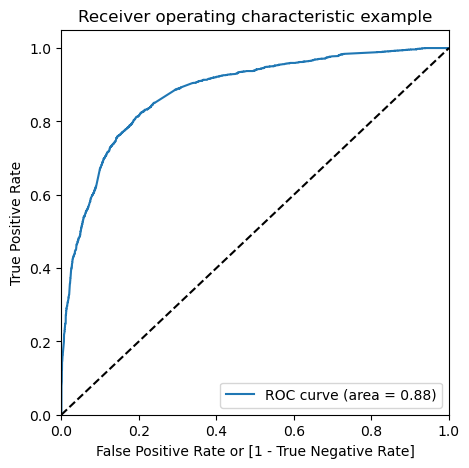

In [271]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob)

The ROC Curve should be a value close to 1. We are getting a value of 0.88 indicating a good predictive model.

## Step 12: Finding Optimal Cutoff Point

In [272]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.251101,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.227254,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.293178,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.823876,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.222174,3934,0,1,1,1,0,0,0,0,0,0,0


In [273]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificty'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificty
0.0          0.0  0.375569     1.000000    0.000000
0.1          0.1  0.573559     0.970318    0.334926
0.2          0.2  0.741561     0.910535    0.639930
0.3          0.3  0.801853     0.829849    0.785014
0.4          0.4  0.817240     0.762960    0.849887
0.5          0.5  0.818653     0.699415    0.890370
0.6          0.6  0.798084     0.586957    0.925069
0.7          0.7  0.782697     0.505853    0.949208
0.8          0.8  0.763385     0.416806    0.971838
0.9          0.9  0.714241     0.257525    0.988936


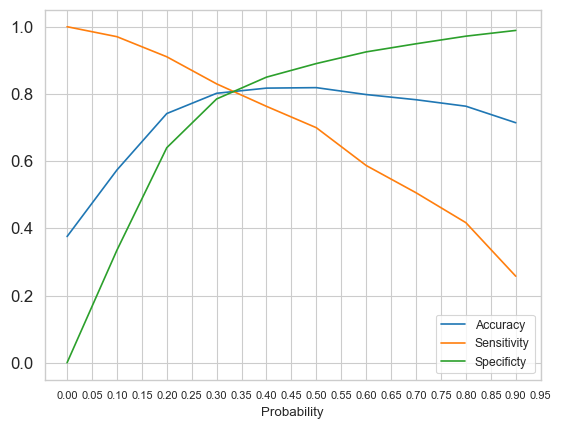

In [274]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style('whitegrid')
sns.set_context('paper')

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificty'])
plt.xticks(np.arange(0,1,step=.05), size=8)
plt.yticks(size=12)
plt.show()

From the above curve we can see that the optimal cutoff is at 0.35. This is the point where all the parameters -Accuracy,Sensitivity,Specificity are equally balanced

In [275]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.251101,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.227254,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.293178,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.823876,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.222174,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [276]:
#Assigning lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Lead_Score_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.251101,1871,0,1,1,1,0,0,0,0,0,0,0,0,25
1,0,0.227254,6795,0,1,1,1,0,0,0,0,0,0,0,0,23
2,0,0.293178,3516,0,1,1,1,0,0,0,0,0,0,0,0,29
3,0,0.823876,8105,1,1,1,1,1,1,1,1,1,1,0,1,82
4,0,0.222174,3934,0,1,1,1,0,0,0,0,0,0,0,0,22


In [277]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8090752080389386

In [278]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3252,  725],
       [ 491, 1901]])

In [279]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [280]:
TP / float(TP+FN)

0.794732441471572

In [281]:
# Let us calculate specificity
TN / float(TN+FP)

0.8177017852652754

In [282]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.18229821473472466


In [283]:
# positive predictive value 
print (TP / float(TP+FP))

0.723914699162224


In [284]:
# Negative predictive value
print (TN / float(TN+ FN))

0.86882180069463


when we are selecting the optimal cutoff = 0.35, the various performance parameters Accuracy, Sensitivity & Specificity are all 80%

## Step 13: Metrics - Precision and Recall


In [286]:
## To attain more stability and predict successfully in our model one needs to check two important parameters -precision and recall which tells us the score for result relevancy 
## and how many truly relevant results are returned

In [287]:
#Calculating Precision
precision =round(TP/float(TP+FP),2)
precision

0.72

In [288]:
#Calculating Recall
recall = round(TP/float(TP+FN),2)
recall

0.79

In [289]:
#Calculating precision using precision_score function from sklearn
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.723914699162224

In [290]:
#Calculating recall using recall_score function from sklearn
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.794732441471572

80% suggest a good model

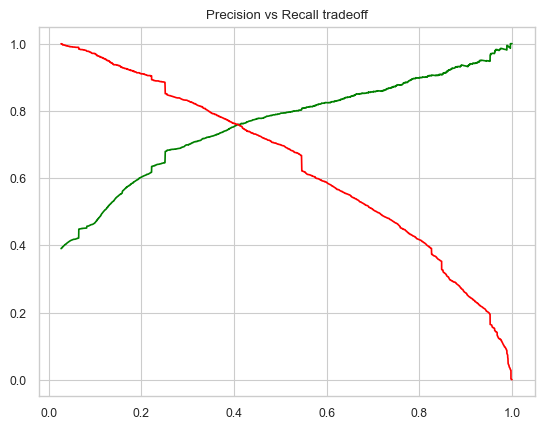

In [291]:
#Let us generate the Precision vs Recall tradeoff curve 
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final['Lead_Score_Prob'])
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

## Step 14: Making predictions on the test set

In [292]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [293]:
X_test = X_test[col5]

X_test.shape

(2772, 16)

In [294]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4269,0,0.964504,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,0,-0.885371,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7766,0,-0.777416,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9199,0,-0.885371,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4359,0,-0.885371,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [295]:
#add constant
X_test_sm = sm.add_constant(X_test)

In [296]:
#making predictions on test set
y_test_pred = res.predict(X_test_sm)

In [297]:
y_test_pred[:10]

4269    0.750874
2376    0.952217
7766    0.889098
9199    0.064989
4359    0.847700
9186    0.575043
1631    0.458060
8963    0.159302
8007    0.050676
5324    0.353259
dtype: float64

In [298]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.750874
2376,0.952217
7766,0.889098
9199,0.064989
4359,0.847700


In [299]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [300]:
# Putting prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [301]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [302]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [303]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.750874
1,1,2376,0.952217
2,1,7766,0.889098
3,0,9199,0.064989
4,1,4359,0.847700


In [304]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Score_Prob'})

In [305]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Lead_Score_Prob'], axis=1)

In [306]:
# Adding Lead_Score column

y_pred_final['Lead_Score'] = round((y_pred_final['Lead_Score_Prob'] * 100),0)

y_pred_final['Lead_Score'] = y_pred_final['Lead_Score'].astype(int)

In [307]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score
0,4269,1,0.750874,75
1,2376,1,0.952217,95
2,7766,1,0.889098,89
3,9199,0,0.064989,6
4,4359,1,0.847700,85


In [308]:
y_pred_final['final_Predicted'] = y_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [309]:
#classifying leads based on Lead score
y_pred_final['Lead_Type'] = y_pred_final.Lead_Score.map(lambda x: 'Hot Lead' if x >35 else 'Cold Lead')
y_pred_final.sort_values(by='Lead_Score', ascending = False)

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted,Lead_Type
546,3478,1,0.999603,100,1,Hot Lead
2077,3248,1,0.996544,100,1,Hot Lead
851,8098,1,0.997216,100,1,Hot Lead
835,4613,1,0.999017,100,1,Hot Lead
416,2804,1,0.997216,100,1,Hot Lead
...,...,...,...,...,...,...
1805,5174,0,0.012836,1,0,Cold Lead
1690,2471,0,0.009800,1,0,Cold Lead
2471,8842,0,0.009214,1,0,Cold Lead
301,6424,0,0.008375,1,0,Cold Lead


In [310]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.816017316017316

In [311]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1385,  292],
       [ 218,  877]])

In [312]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [313]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8009132420091324

In [314]:
# Let us calculate specificity
TN / float(TN+FP)

0.8258795468097794

In [315]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7502138579982891

In [316]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8009132420091324

Final Observation:
Lets compare the Model Performance parameters oobtained for Train & Test data:
1. Train Data: Accuracy : 81% Sensitivity : 80% Specificity : 81% Precision : 72% Recall : 80%
2. Test Data: Accuracy : 81% Sensitivity : 80% Specificity : 82% Precision : 75% Recall : 80%

Observation
1. We got around 1% difference on train and test data's performance metrics.This implies that our final model didn't overfit training data and is performing well.

2. High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected.

3. Depending on the business requirement, we can increase or decrease the probability threshold value with in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model.

Recommendations -
1. The sales team of the X-Education should focus on the leads having lead origin - lead add form , occupation - Working Professional , Lead source - Wellingak website.
2. Sales Team of the company should first focus on the 'Hot Leads'
3. The 'Cold Leads'(Customer having lead score <= 35) should be focused after the Sales Team is done with the 'Hot Leads'.
4. High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected.
5. We have high recall score than precision score. Hence this model has an ability to adjust with the company’s requirements in coming future.
6. Its better that we can ask students to fill many important fields like location details which can be used for futher analysis
7. We can ignore customers who do not want to be called about the course.
8. If the Last Notable Activity is Modified, he/she may not be the converted to lead